# Midterm T2 2016

The midterm consists of two parts: 

 - **Easy Zone** which worth 100 point each which most of them you can just copy from exercise/homework
 - **Creative zone** which worth 125 points each.
 - The score for each sub question is equal unless indicated.
 - Comment your code!! If it takes me more than 5 minutes to figure out what your code does, I won't grade it.

The total score is 850 but you will be graded out of 0.9*850=765.


In [1]:
%matplotlib inline
import numpy as np
from matplotlib import pyplot as plt
import math

## Easy Zone (100 Each)

### 1 Taylor Series

1) Find the first 3 *non-zero* terms in Taylor series of
$$f(x) = sin(2x)$$

$$a_0 = sin(2x) = sin(0) = 0$$


$$a_1 = 2cos(2x) = 2cos(0) = 2$$


$$a_2 = -2^2sin(2x) = 0$$


$$a_3 = -2^3cos(2x) = -2^3cos(0) = -2^3 $$


$$a_4 = 2^4sin(2x) = 0$$

$$a_5 = 2^5cos(2x) = 2^5cos(0)=  2^5$$

$$ 2x - \frac{2^3x^3}{3!} + \frac{2^5x^5}{5!} $$

2) Use the Taylor series you found in 1) to find $$sin(0.2)$$ **along with bound on error**.

$$ error = f^3(\xi) \frac{x^3}{3!}  = \frac{1}{(1-\xi)^4} \frac{x^3}{3!}$$

$$ x = 0.2, \xi \in (0,0.2) $$

Max at $\xi = 0.2$

$$ error = f^3(\xi) \frac{x^3}{3!}  = \frac{1}{(1-\xi)^4} \frac{x^3}{3!} \le \frac{1}{(1-0.2)^4} \frac{0.2^3}{3!}$$


$$ a_6 = -2^6sin(2x) $$

$$ error = f^6(\xi)\frac{x^6}{6!} =  -2^6sin(2\xi)\frac{x^6}{6!}$$

$$ x = 0.1, \xi \in (0, 0.1) $$

$$ error = f^6(\xi)\frac{x^6}{6!} =  -2^6sin(2\xi)\frac{x^6}{6!} \le  -2^6sin(0.2)\frac{0.1^6}{6!}$$

In [454]:
taylor_sin = lambda x: 2*x - (4./3 * x**3) + (4./15 * x**5)
fac = lambda x: 1 if (x <= 1) else x * fac(x - 1)
error_taylor_sin = lambda x, xi = 0.1: 2**6 * np.sin(2 * xi) * x**6/fac(6)

taylor_sin(0.1), error_taylor_sin(0.1)

(0.19866933333333336, 1.7659496070672113e-08)

In [455]:
taylor_sin(0.1) - error_taylor_sin(0.1), np.sin(0.2), taylor_sin(0.1) + error_taylor_sin(0.1)

(0.1986693156738373, 0.19866933079506122, 0.19866935099282942)

## 2) Bisection

We know that 

$$\sin\left(\frac{\pi}{4}\right) = \cos\left(\frac{\pi}{4}\right)$$

This means that we can find the value of $\pi$ by finding the solution of

$$\sin(x) = \cos(x)$$

Then multiply the solution by 4. Then we get the value of $\pi$.

1) Since we multiply solution by 4 at the end. This means that if we want the value of $\pi$ that is accurate at least $10^{-6}$ we need to make sure that our method of finding the solution to $\sin(x) = \cos(x)$ is accurate at least $\displaystyle \frac{10^{-6}}{4}$.

If our initial range is from $x=[0,2]$ and the method we use is bisection, how many iterations do we need to make sure that the solution is at most $\displaystyle\frac{10^{-6}}{4}$ from the real answer.

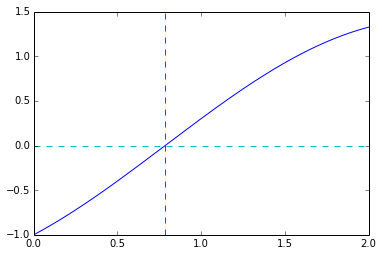

In [456]:
find_pi = lambda x: np.sin(x) - np.cos(x)

xs = np.linspace(0, 2, 1000)
ys = find_pi(xs)

plt.plot(xs, ys)
plt.axhline(0, c = 'c', ls = '--')
plt.axvline(np.pi/4., c = 'r', ls = '--')

In [478]:
def findInt(f, fm, to, e = 1e-6):
    
    mid = (fm + to)/2.
    num_iter = 1
    while np.abs(f(mid) * 4) > e:
        if f(mid) < 0 and f(to) >= 0:
            fm = mid
        else:
            to = mid
        mid = (fm + to)/2.
        num_iter += 1
        
    return mid, num_iter

In [479]:
x_int, num_iter = findInt(find_pi, 0, 2)

In [480]:
print num_iter

22


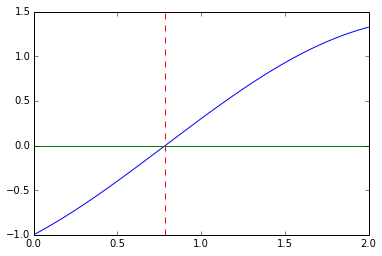

In [481]:
xs = np.linspace(0, 2, 1000)
ys = find_pi(xs)

plt.plot(xs, ys)
plt.axvline(x_int, c = 'r', ls='--')
plt.axhline(0, c = 'g')

2) Find the value of $\pi$ that is accurate at least $10^{-6}$ using the method above.

In [482]:
x_int * 4, np.pi

(3.141592025756836, 3.141592653589793)

### 3 Newton's Method

1) (40) In the homework we found that we can find $\sqrt{x}$ using 

$$x_{n+1}  = \frac{\displaystyle x_{n} + \frac{2}{x_n}}{2}$$

Derive an analogous relation for finding $\sqrt[5]{x}$

In [483]:
def fifthRoot(a, n = 10**5):
    sqrt = lambda x, a: (4*x + a/x**4)/5.
    x = a
    for i in xrange(n):
        x = sqrt(x, a)
    return x

2) (40) Find $\sqrt[5]{31}$ to a decent accuracy using what you found above

In [484]:
fifthRoot(31), 31**(1./5)

(1.987340754664458, 1.9873407546644581)

3) (20) Newtons's Method vs Bisection method.

3.1) Which one converge faster?

3.2) Why should we bother using slower one?

# --------------

3.1) Newton is faster


3.2) Newton doesn't always converge

# --------------

### 4 Legendre

1)If we use Legendre method to find polynomail which passes through all thsese points. What would be the degree of the polynomial? (20)

(-2, 2)

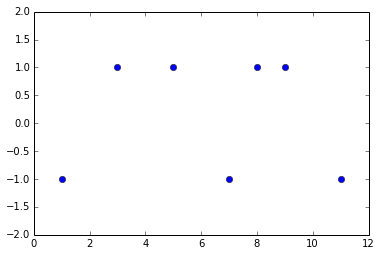

In [485]:
xs = [1,3,5,7,8,9,11]
ys = [-1,1,1,-1,1,1,-1]
plt.plot(xs,ys,'o')
plt.ylim(-2,2)

2) Use Legendre method and plot polynomial which passes through all the points given. (80)

In [486]:
def get_f(xs, y, idx):
    bottom = np.product([ 1. if (i == idx) else xs[idx] - xs[i] for i in xrange(len(xs)) ])
    def f(x):
        top = np.product([y if (i == idx) else x - xs[i] for i in xrange(len(xs)) ])
        return top/bottom
    return f

fs = [get_f(xs, ys[i], i) for i in xrange(len(xs))]
func = lambda x: sum([f(x) for f in fs])

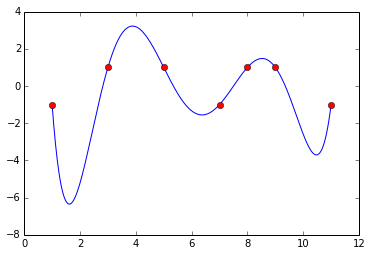

In [487]:
pxs = np.linspace(1-1e-5,11-1e-5,500)
pys = [func(x) for x in pxs]
plt.plot(pxs, pys)
plt.plot(xs,ys, 'ro')

In [488]:
len(xs) - 1

6

### 5 Integration

1) We want to calculate

$$\int_3^7 \sqrt{x} \; dx$$

using trapezoid rule such that the answer is at most $10^{-5}$ away from the real answer how many pieces do we need?

In [535]:
def cal_error(fm, to, n, fdxdx):
    return (((to - fm)**3.)/(12. * n**2))*fdxdx(3.)

In [536]:
def cal_terms(fdxdx, fm, to, e = 1e-5):
    n = 1
    while np.abs(cal_error(fm, to, n, fdxdx)) > e:
        n += 1
    return n

In [537]:
fdxdx = lambda x: -(1./(4. * x**(3./2)))
terms = cal_terms(fdxdx, 3, 7)
print terms

161


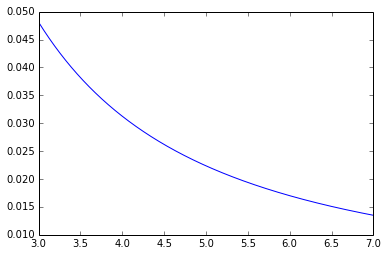

In [538]:
xs = np.linspace(3, 7, 1000)
plt.plot(xs, np.abs(fdxdx(xs)))

2) Use trapezoid rule to calculate
$$\int_3^7 \sqrt{x} \; dx$$
such that your answer is at most $10^{-5}$ from the real answer.


In [554]:
# def cal_area(fm, to, n):
#     f = lambda x: x**0.5
    
#     a = (f(fm) + f(to)) * 0.5
#     h = (to - fm)/float(n)
#     #x = fm + h
#     x = fm
#     for i in xrange(1,n):
#         a += f(x + h*i)
# #     while x < to:
# #         a += f(x)
# #         x += h
#     return a * h

def cal_area(fm, to, n):
    f = lambda x: x**0.5
    
    a = (f(fm) + f(to)) * 0.5
    h = (to - fm)/float(n)
    x = fm
    for i in xrange(1,n):
        a += f(x + h*i)
    return a * h

In [555]:
cal_area(3, 7, terms), 8.882737834, np.abs(cal_area(3, 7, terms) - 8.882737834)

(8.882732708470547, 8.882737834, 5.125529453309241e-06)

### 6 Derivative

1) Find the lowest point in the of function `math.lgamma` in the range of [1,2]. (Give me both x and y) 

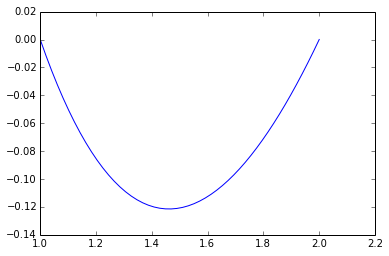

In [163]:
xs = np.linspace(1, 2)
ys = [math.lgamma(x) for x in xs ]
plt.plot(xs, ys)

In [171]:
def findMin(f, fm, to):
    def cenDif(x, h = 1e-10):
        return lambda x: (f(x + h) - f(x - h))/(2. * h)
    fdx = cenDif(f)
    
    def findInt(f, fm, to, e = 1e-6):
        mid = (fm + to)/2.
        while np.abs(f(mid)) > e:
            if f(mid) < 0 and f(to) >= 0:
                fm = mid
            else:
                to = mid
            mid = (fm + to)/2.
        return mid
    
    return findInt(fdx, fm,to)

In [172]:
x_min = findMin(lambda x: math.lgamma(x), 1, 2)

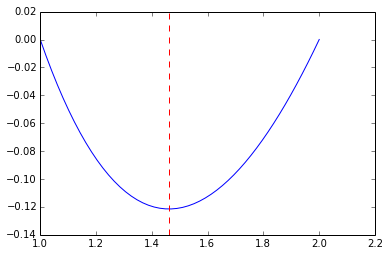

In [174]:
xs = np.linspace(1, 2)
ys = [math.lgamma(x) for x in xs ]
plt.plot(xs, ys)
plt.axvline(x_min, c = 'r', ls = '--')

2) Show that 
$$\frac{9f(x+h)-f(x+3h)-8f(x)}{6h} = f'(x) + O(h^2)$$

$$ f(x+h) = f(x) + f^1(x)h + \frac{f^2(x)h^2}{2!} + \frac{f^3(\xi)h^3}{3!} $$

$$ f(x+3h) = f(x) + f^1(x)3h + \frac{f^2(x)3^2h^2}{2!} + \frac{f^3(\xi)3^3h^3}{3!} $$

$$ f'(x) + O(h^2) = \frac{9 \times (f(x) + f^1(x)h + \frac{f^2(x)h^2}{2!} + \frac{f^3(\xi)h^3}{3!}) - (f(x) + f^1(x)3h + \frac{f^2(x)3^2h^2}{2!} + \frac{f^3(\xi)3^3h^3}{3!}) - 8f(x)}{6h} $$

$$ = \frac{6f^1(x)h + \frac{-18f^3(\xi)h^3}{3!}}{6h} $$

$$ = f^1(x) + \frac{-3f^3(\xi)h^2}{3!} $$

## Creative Zone (125 Each)

The questions may look ridiculous. ** Do not panic **. It is much easier than it looks.

### 7 Confidence Interval

##### Intro


In the homework you have calculated full width half max which is a measure of how spread out a distribution is there is another measure which has a better statistical intepretation and is widely used called 95% confidence interval.

All the statistical interpretations aside(which you will learn in AJ Ko's class), the 95% interval is defined to be an interval symmetric around the most probable(highest value) $\bar{x}$, 
$$[\bar{x} - \alpha, \bar{x} + \alpha]$$ such that the **area under the distribution in this interval is 95% of the total area**. Note that the range is symmetric around the most probable(highest value) $\bar{x}$.

The concept is illustrated in the figure below that the 95% confidence interval of the distribution shown below is approximately [-1.2,1.6] since the highest point is at 0.2 and the area of interval [0.2-1.4, 0.2+1.4] = [-1.2, 1.6] is about 95% of the total area.

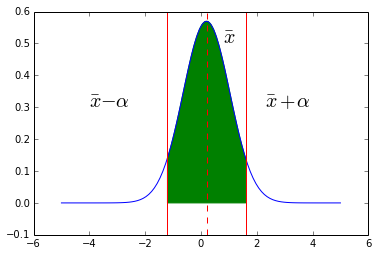

In [556]:
def gaussian(x):
    sigma = 0.7
    mu = 0.2
    return 1/math.sqrt(2*math.pi*sigma**2)*np.exp(-(x-mu)**2/(2*sigma))

xs = np.linspace(-5,5,100)
ys = gaussian(xs)

xs2 = np.linspace(-1.2,1.6,100)
ys2 = gaussian(xs2)



plt.plot(xs, ys)
plt.fill_between(xs2, 0, ys2,color='green')
plt.axvline(1.6,color='r')
plt.axvline(-1.2,color='r')
plt.axvline(0.2,color='r',ls='dashed')
plt.text(-4,0.3, r'$\bar{x}-\alpha$',size=20)
plt.text(2.3, 0.3, r'$\bar{x}+\alpha$',size=20)
plt.text(0.8, 0.5,r'$\bar{x}$', size=20)


##### Your task

For this problem your task is to find 95% confidence interval for the following distribution.
$$f(x) = \frac{1}{\pi\gamma} \frac{1}{(x-\mu)^2+\gamma^2}$$
with $\mu = 1.$ and $\gamma = 2.$. Your answer should be a range. (Do it for a reasonable accuracy. If you have done the homework, you know what I mean)

You may assume that the total area from $x=-\infty, \infty$ of this distribution is 1. (It actually is 1.)

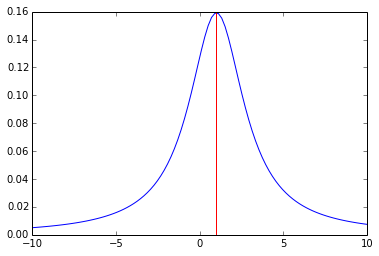

In [557]:
def cauchy(x):
    mu = 1.
    gamma = 2.
    return 1./(math.pi*gamma)*(gamma**2/((x-mu)**2+gamma**2))

xs = np.linspace(-10,10, 100)
ys = cauchy(xs)
plt.plot(xs, ys)
plt.axvline(1, c = 'r')

In [578]:
# def cal_area(f, fm, to, n = 1e5):
#     a = (f(fm) + f(to)) * 0.5
#     h = (to - fm)/float(n)
#     x = fm + h
#     while x < to:
#         a += f(x)
#         x += h
#     return a * h

def cal_area(f, fm, to, n = 1e5):
    
    a = (f(fm) + f(to)) * 0.5
    h = (to - fm)/float(n)
    x = fm
    for i in xrange(1,int(n)):
        a += f(x + h*i)
    return a * h

cal_cauchy_area = lambda x, mu = 0.2, f = cauchy: cal_area(f, mu - x, mu + x)

In [579]:
def findInt(f, fm, to, e = 1e-6):
    g = lambda x: f(x) - 0.95
    mid = (fm + to)/2.
    while np.abs(g(mid)) > e:
        if g(mid) < 0 and g(to) >= 0:
            fm = mid
        else:
            to = mid
        mid = (fm + to)/2.
    return mid

In [580]:
x_int = findInt(cal_cauchy_area, 0, 100)

In [581]:
cal_cauchy_area(x_int)

0.9499995092050124

In [582]:
print x_int

25.4371643066


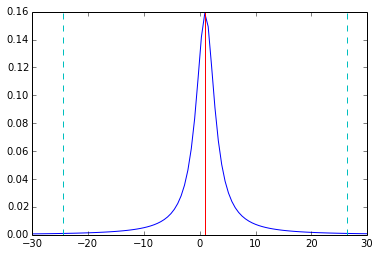

In [583]:
def cauchy(x):
    mu = 1.
    gamma = 2.
    return 1./(math.pi*gamma)*(gamma**2/((x-mu)**2+gamma**2))

xs = np.linspace(-30,30, 100)
ys = cauchy(xs)
plt.plot(xs, ys)
plt.axvline(1, c = 'r')
plt.axvline( 1 - x_int, c = 'c', ls = '--')
plt.axvline( 1 + x_int, c = 'c', ls = '--')

### 8 Sum of $i^k$


#### Intro

In discrete math we learn that the sum of integer from $1 \ldots n$ is given by
$$\sum_{i=1}^n i = \frac{n(n-1)}{2} = \frac{n^2}{2} - \frac{n}{2}$$
and
$$\sum_{i=1}^n i^2 = \frac{n^3}{3}+\frac{n^2}{2}+\frac{n}{6}$$
and
$$\sum_{i=1}^n i^3 = \left( \frac{n(n-1)}{2} \right)^2 = \frac{n^4}{4} + \ldots$$

As you may notice, one can actually show that $\displaystyle \sum_{i=1}^n i^k$ has is a polynomial of degree $k+1$.

To calculate the sum if we use for loop and calculate the left hand side it will be $O(n)$. But if we use the right hand side we can calculate it in $O(1)$. So, calculating it with a closed form is a much better approach.

But as you recall getting the close formed formula is quite difficult to do by hands. In this problem we will use legendre method to find it.

#### Problem

In this problem we want to calculate 
$$\sum_{i=1}^n i^7$$
We expect this to have a closed form of polynomial of degree 8.

Use what you learn about Legendre Method and write a function that takes in $n$ and calculate $$\sum_{i=1}^n i^7$$ in O(1). (Any other methods will not be accepted)

##### Warning: don't try to sum up too far as it can cause integer overflow.

In [2]:
f = lambda x: sum( [i**7 for i in xrange(1, x + 1)] )
xs = range(10)
ys = [f(x) for x in xrange(len(xs))]

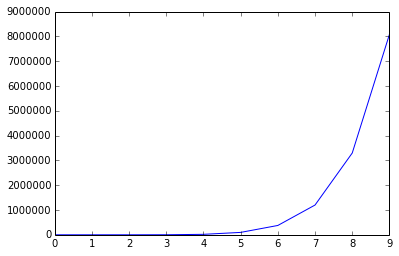

In [3]:
plt.plot(xs, ys)

In [4]:
def get_f(xs, y, idx):
    bottom = np.product([ 1. if (i == idx) else xs[idx] - xs[i] for i in xrange(len(xs)) ])
    def f(x):
        top = np.product([y if (i == idx) else x - xs[i] for i in xrange(len(xs)) ])
        return top/bottom
    return f

fs = [get_f(xs, ys[i], i) for i in xrange(len(xs))]
func = lambda x: sum([f(x) for f in fs])

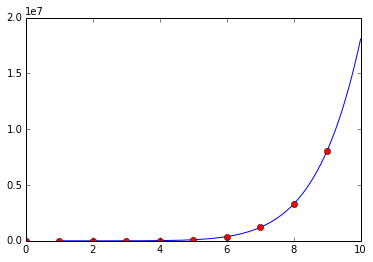

In [5]:
pxs = np.linspace(1,10,100)
pys = [func(x) for x in pxs]
plt.plot(pxs, pys)
plt.plot(xs,ys, 'ro')

In [6]:
func(10), f(10)

(18080425.0, 18080425)

In [9]:
xs = np.array(range(10))

In [13]:
print [ int(func(x)) for x in xs]

[0, 1, 129, 2316, 18700, 96825, 376761, 1200304, 3297456, 8080425]
